# live  visualization of  voice in waveform

In [6]:
# using fast fourier transform method 
 
import pyaudio
import os
import struct
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft
import time
from tkinter import TclError

# to display in separate Tk window
%matplotlib tk

# constants
CHUNK = 1024 * 2             # samples per frame
FORMAT = pyaudio.paInt16     # audio format (bytes per sample?)
CHANNELS = 1                 # single channel for microphone
RATE = 44100          # samples per second

# create matplotlib figure and axes
fig, (ax1, ax2) = plt.subplots(2, figsize=(15, 7))

# pyaudio class instance
p = pyaudio.PyAudio()

# stream object to get data from microphone
stream = p.open(
    format=FORMAT,
    channels=CHANNELS,
    rate=RATE,
    input=True,
    output=True,
    frames_per_buffer=CHUNK
)

# variable for plotting
x = np.arange(0, 2 * CHUNK, 2)       # samples (waveform)
xf = np.linspace(0, RATE, CHUNK)     # frequencies (spectrum)

# create a line object with random data
line, = ax1.plot(x, np.random.rand(CHUNK), '-', lw=2)

# create semilogx line for spectrum
line_fft, = ax2.semilogx(xf, np.random.rand(CHUNK), '-', lw=2)

# format waveform axes
ax1.set_title('AUDIO WAVEFORM')
ax1.set_xlabel('samples')
ax1.set_ylabel('volume')
ax1.set_ylim(0, 255)
ax1.set_xlim(0, 2 * CHUNK)
plt.setp(ax1, xticks=[0, CHUNK, 2 * CHUNK], yticks=[0, 128, 255])

# format spectrum axes
ax2.set_xlim(20, RATE / 2)

print('stream started')

# for measuring frame rate
frame_count = 0
start_time = time.time()

while True:
    
    # binary data
    data = stream.read(CHUNK)  
    
    # convert data to integers, make np array, then offset it by 127
    data_int = struct.unpack(str(2 * CHUNK) + 'B', data)
    
    # create np array and offset by 128
    data_np = np.array(data_int, dtype='b')[::2] + 128
    
    line.set_ydata(data_np)
    
    # compute FFT and update line
    yf = fft(data_int)
    line_fft.set_ydata(np.abs(yf[0:CHUNK])  / (128 * CHUNK))
    
     # update figure canvas
    try:
        fig.canvas.draw()
        fig.canvas.flush_events()
        frame_count += 1
        
    except TclError:
        
        # calculate average frame rate
        frame_rate = frame_count / (time.time() - start_time)
        
        print('stream stopped')
        print('average frame rate = {:.0f} FPS'.format(frame_rate))
        break
    


stream started
stream stopped
average frame rate = 7 FPS


# converting audio to wave form 

In [15]:
#storing noise as RECORDING.wav file 
#storing original audio as VOICE.wav

import pyaudio
import wave

CHUNK = 1024
FORMAT = pyaudio.paInt16
CHANNELS = 2
RATE = 44100 
RECORD_SECONDS = 10                 #enter the time required for making audio here
WAVE_OUTPUT_FILENAME = "VOICE.wav"

p = pyaudio.PyAudio()

stream = p.open(format=FORMAT,
                channels=CHANNELS,
                rate=RATE,
                input=True,
                frames_per_buffer=CHUNK)

print("* recording")

frames = []

for i in range(0, int(RATE / CHUNK * RECORD_SECONDS)):
    data = stream.read(CHUNK)
    frames.append(data)

print("* done recording")

stream.stop_stream()
stream.close()
p.terminate()

wf = wave.open(WAVE_OUTPUT_FILENAME, 'wb')
wf.setnchannels(CHANNELS)
wf.setsampwidth(p.get_sample_size(FORMAT))
wf.setframerate(RATE)
wf.writeframes(b''.join(frames))
wf.close()

* recording
* done recording


# speech to text 

In [16]:
import speech_recognition as sr
r = sr.Recognizer()

hellow=sr.AudioFile('VOICE.wav')
with hellow as source:
    audio = r.record(source)
try:
    s = r.recognize_google(audio)
    print("Text: "+s)
except Exception as e:
    print("Exception: "+str(e))
    

Text: hello my name is Harish Rao on YouTube reminder you thank you


In [17]:
# import IPython.display as ipd
# % pylab inline
# import os
# import pandas as pd
# import librosa
# import glob 


# ipd.Audio('C:/Users/ADMIN/Desktop/apli.ai/VOICE.wav')

# data, sampling_rate = librosa.load('C:/Users/ADMIN/Desktop/apli.ai/VOICE.wav')




# plt.figure(figsize=(12, 4))
# librosa.display.waveplot(data, sr=sampling_rate)

# Exploratory data analysis
 
 

In [38]:
import os
from os.path import isdir, join
from pathlib import Path
import pandas as pd

# Math
import numpy as np
from scipy.fftpack import fft
from scipy import signal
from scipy.io import wavfile
import librosa

from sklearn.decomposition import PCA

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import IPython.display as ipd
import librosa.display

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import pandas as pd

%matplotlib inline


In [49]:
#resamplaing 

In [50]:
def custom_fft(y, fs):
    T = 1.0 / fs
    N = y.shape[0]
    yf = fft(y)
    xf = np.linspace(0.0, 1.0/(2.0*T), N//2)
    vals = 2.0/N * np.abs(yf[0:N//2])  # FFT is simmetrical, so we take just the first half
    # FFT is also complex, to we take just the real part (abs)
    return xf, vals

In [51]:
filename = '../apli.ai/VOICE.wav'
new_sample_rate = 8000

sample_rate, samples = wavfile.read(str(train_audio_path) + filename)
resampled = signal.resample(samples, int(new_sample_rate/sample_rate * samples.shape[0]))

C:\ProgramData\Anaconda\lib\site-packages\scipy\signal\signaltools.py:2223: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.

C:\ProgramData\Anaconda\lib\site-packages\scipy\signal\signaltools.py:2225: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.

C:\ProgramData\Anaconda\lib\site-packages\scipy\signal\signaltools.py:2230: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will 

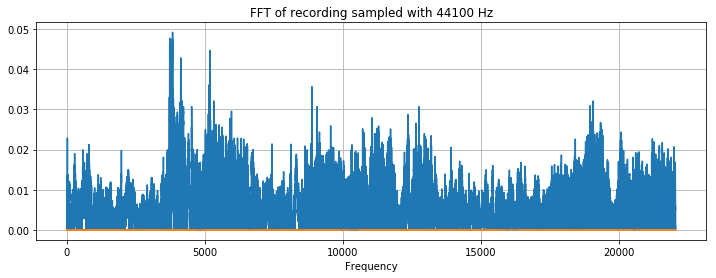

In [52]:
xf, vals = custom_fft(samples, sample_rate)
plt.figure(figsize=(12, 4))
plt.title('FFT of recording sampled with ' + str(sample_rate) + ' Hz')
plt.plot(xf, vals)
plt.xlabel('Frequency')
plt.grid()
plt.show()
